In [29]:
!pip install wordcloud
!pip install psycopg2-binary
!pip install pandas
!pip install matplotlib

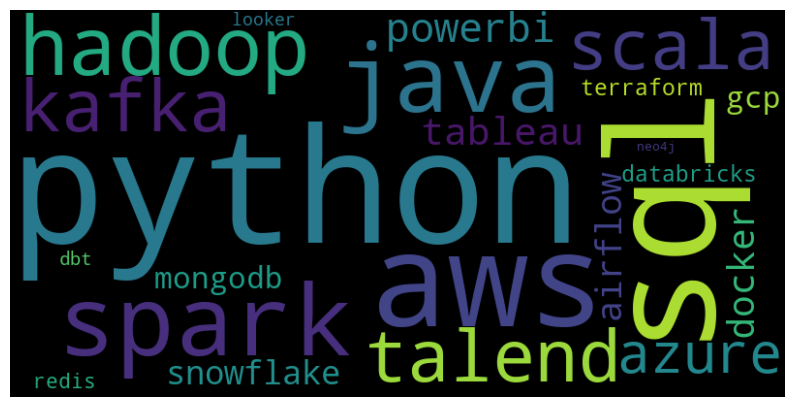

In [33]:
# visualize the frequency of the technologies in data engineering
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import psycopg2
import pandas as pd
import warnings
warnings.simplefilter("ignore", UserWarning)
with psycopg2.connect(dbname='airflow', user='airflow', password='airflow', host='postgres', port='5432') as conn:
    sql = "select * from tech_stack;"
    df_tech = pd.read_sql_query(sql, conn)
df_cloud = df_tech[['name','frequency']].drop_duplicates()
data = df_cloud.set_index('name').to_dict()['frequency']
wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(data)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

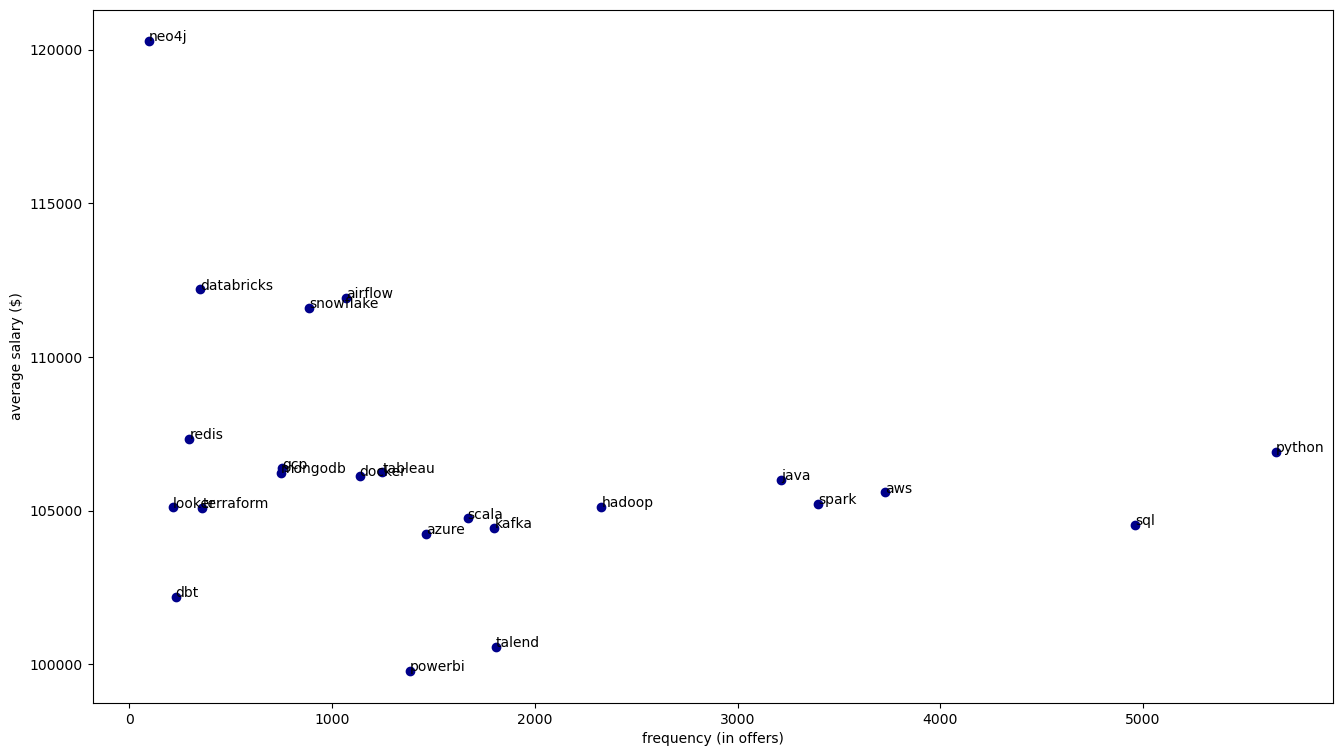

In [34]:
# open figure + axis
fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
# plot
ax.scatter(x=df_tech['frequency'],y=df_tech['salary_average'],c='DarkBlue')
# set labels
ax.set_xlabel('frequency (in offers)')
ax.set_ylabel('average salary ($)')

# annotate points in axis
for idx, row in df_tech.iterrows():
    ax.annotate(row['name'], (row['frequency'], row['salary_average']) )
# force matplotlib to draw the graph
plt.show()